source code : https://www.kaggle.com/code/tunguz/us-consumer-price-index-and-inflation-eda-starter/comments

> Indented block

> **Indented block**





In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('cpiai_csv.csv')
df.head()

,Date,Index,Inflation
0,1913-01-01,9.8,NaN
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02


In [7]:
df.tail()

,Date,Index,Inflation
1208,2013-09-01,234.149,0.12
1209,2013-10-01,233.546,-0.26
1210,2013-11-01,233.069,-0.20
1211,2013-12-01,233.049,-0.01
1212,2014-01-01,233.916,0.37


In [3]:
df=df.drop(columns='Date',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      1213 non-null   float64
 1   Inflation  1212 non-null   float64
dtypes: float64(2)
memory usage: 19.1 KB


In [ ]:
df['Inflation'].fillna(method='ffill').value_counts()

 0.00    282
 0.32     21
 0.30     20
 0.33     18
 0.24     17
        ... 
-0.33      1
-2.21      1
-1.82      1
 2.96      1
-0.01      1
Name: Inflation, Length: 269, dtype: int64

In [ ]:
df['Inflation']=df['Inflation'].replace('Nan',0)

In [ ]:
df['Inflation'] = df['Inflation'].replace(np.nan, mean)


In [ ]:
df.head()

,Index,Inflation
0,9.8,0.24
1,9.8,0.00
2,9.8,0.00
3,9.8,0.00
4,9.7,-1.02


In [ ]:
df.shape

(1213, 3)

In [ ]:
df.isna().sum()

Date         0
Index        0
Inflation    1
dtype: int64

In [ ]:
#mencari nilai median
median=df['Inflation'].astype('float64').median()
median

0.24

In [ ]:
mean=df['Inflation'].astype('float64').median()
mean

0.24

In [ ]:
df['Inflation']=df['Inflation'].replace('NaN',median)

In [ ]:
#data kosong direplace menggunakan  median
df.loc[0]['Inflation']=median
df.loc[0]['Inflation']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


nan

In [ ]:
#method chaining gabungin antar 
df['Inflation'].fillna(value=median).value_counts()

 0.00    282
 0.32     21
 0.30     20
 0.24     19
 0.33     18
        ... 
-0.79      1
 3.15      1
-0.69      1
-1.39      1
-0.01      1
Name: Inflation, Length: 269, dtype: int64

In [ ]:
df.head()

,Date,Index,Inflation,year_added,month_added
0,1913-01-01,9.8,NaN,1913,1
1,1913-02-01,9.8,0.00,1913,2
2,1913-03-01,9.8,0.00,1913,3
3,1913-04-01,9.8,0.00,1913,4
4,1913-05-01,9.7,-1.02,1913,5


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1213 non-null   datetime64[ns]
 1   Index      1213 non-null   float64       
 2   Inflation  1212 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 28.6 KB


In [ ]:
##experimenting 2 different syntax for formatting datetime datatype
df['year_added'] = pd.DatetimeIndex(df['Date']).year  
df['month_added'] = pd.DatetimeIndex(df['Date']).month  
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1213 non-null   datetime64[ns]
 1   Index        1213 non-null   float64       
 2   Inflation    1212 non-null   float64       
 3   year_added   1213 non-null   int64         
 4   month_added  1213 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 47.5 KB


,Date,Index,Inflation,year_added,month_added
0,1913-01-01,9.8,NaN,1913,1
1,1913-02-01,9.8,0.00,1913,2
2,1913-03-01,9.8,0.00,1913,3
3,1913-04-01,9.8,0.00,1913,4
4,1913-05-01,9.7,-1.02,1913,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1213 non-null   datetime64[ns]
 1   Index        1213 non-null   float64       
 2   Inflation    1212 non-null   float64       
 3   year_added   1213 non-null   int64         
 4   month_added  1213 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 47.5 KB


In [ ]:
#splitting training dan test set  
from sklearn.model_selection import train_test_split #asumsi harus dikasih 2 nilai features dan target jadi dari dataset harus dipisahin 

#definisikan features  : pisahkan features dan target 
feature = df.drop(columns='Inflation') 
target = df[['Inflation']] 

#split data proporsi (80 training) :(20 test)  masingmasing target dan features : trained dan test 
feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
#definisikan model kosongan nya /model mentah sebelum di trained 
from sklearn.linear_model import LinearRegression 

# define the model mentah yang belum ditrained, bebas nama apa aja 
simple_reg = LinearRegression()

# train the model :setelah split data proporsi, perlu merubah bentuk data menjadi np array karena sklearn bekerja dengan numpy  
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()

#fit proses training
#modelkosongan/mentah kita minta untuk belajar/mengamati pola hubungan antar x dan y  
simple_reg.fit(X_df_train, y_df_train)


LinearRegression()

In [ ]:
# retrieve the coefficients hasi paramater yang didapatkan 
# show as a nice dataframe

data = feature_df_train

model = simple_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})
coef_df 

,feature,coefficient
0,intercept,0.259598
1,Index,0.000063


Ketika ada kenaikan US consumer index 1 point, maka akan berkorespondasi/asosiasi dengan kenaikan inflasi erupsi selama 0.000063 point

In [ ]:
#3. Model diagnosis : gambar residual plot  untuk hitung residual plot 

#Bikin vektor namanya hasil prediksi kita, simpan sebagai verktor (array) yaitu y predict train. 
#kita pakai model kita untuk memprediksi 
y_predict_train = simple_reg.predict(X_df_train) 

#residual data sebenernya dikurang data hasil prediksi model kita 
# calculate residuals
residual = y_df_train - y_predict_train

#preprocess shape : menyesuaiakan shape ikutin trmplate saja 
X_df_train_flat = np.array([value for nested_array in X_df_train for value in nested_array])
residual = np.array([value for nested_array in residual for value in nested_array])


In [ ]:
# prepare dataframe: untuk gambar residual plot 
# kalo 1 predictor --> residual plot adalah 
#sumbu x :predictor/training data kita  
#sumbu y residual 
dfx= pd.DataFrame({
    'x_axis': X_df_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=dfx, x="x_axis", y="residual")
plt.show()

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


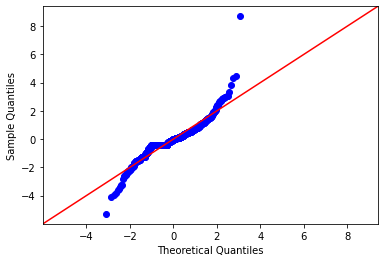

In [ ]:
from sklearn.preprocessing import StandardScaler


std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()